<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Trevor Green

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
#from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state
    


In [2]:
filepath = 'voters1800.csv'
df = pd.read_csv(filepath)
df.head()

dfVirginia = df.loc[df["State"]=="Virginia"]
print("There are ", len(dfVirginia), " voters in Virgina.")
ageVirginia = dfVirginia["Age"]


dfSC = df.loc[df["State"]=="South Carolina"]
print("There are ", len(dfSC), " voters in South Carolina.")
ageSC = dfSC["Age"]


dfMas = df.loc[df["State"]=="Massachusets"]
print("There are ", len(dfMas), " voters in Massachusets.")
ageMas = dfMas["Age"]

dfNY = df.loc[df["State"]=="New York"]
print("There are ", len(dfNY), " voters in New York.")
ageNY = dfNY["Age"]

print("\n")

print("The five number summary for age in Virginia is")
display(ageVirginia.describe())
print("The five number summary for age in New York is")
display(ageNY.describe())
print("The five number summary for age in Massachusetts is")
display(ageMas.describe())
print("The five number summary for age in South Carolina is")
display(ageSC.describe())

#Farming
dfI1Farming = df.loc[df["Interest1"]=="Farming"]
print(len(dfI1Farming), "or ", ((len(dfI1Farming)/932)*100), "% of voters had a first interest of farming" )
dfI1Farming = df.loc[df["Interest2"]=="Farming"]
print(len(dfI1Farming), "or ", ((len(dfI1Farming)/932)*100), "% of voters had a second interest of farming" )
dfI1Farming = df.loc[df["Interest3"]=="Farming"]
print(len(dfI1Farming), "or ", ((len(dfI1Farming)/932)*100), "% of voters had a third interest of farming" )
print("\n")


#Alc and Tobac
dfI1Alc = df.loc[df["Interest1"]=="Alcohol & Tobacco"]
print(len(dfI1Alc), "or ", ((len(dfI1Alc)/932)*100), "% of voters had a first interest of Alcohol and Tobacco" )
dfI1Alc = df.loc[df["Interest2"]=="Alcohol & Tobacco"]
print(len(dfI1Alc), "or ", ((len(dfI1Alc)/932)*100), "% of voters had a second interest of Alcohol and Tobacco" )
dfI1Alc = df.loc[df["Interest3"]=="Alcohol & Tobacco"]
print(len(dfI1Alc), "or ", ((len(dfI1Alc)/932)*100), "% of voters had a third interest of Alcohol and Tobacco" )
print("\n")

#Econ
dfI1Econ = df.loc[df["Interest1"]=="Economy"]
print(len(dfI1Econ), "or ", ((len(dfI1Econ)/932)*100), "% of voters had a first interest of Economy" )
dfI1Econ = df.loc[df["Interest2"]=="Economy"]
print(len(dfI1Econ), "or ", ((len(dfI1Econ)/932)*100), "% of voters had a second interest of Economy" )
dfI1Econ = df.loc[df["Interest3"]=="Economy"]
print(len(dfI1Econ), "or ", ((len(dfI1Econ)/932)*100), "% of voters had a third interest of Economy" )
print("\n")

#Religion
dfI1Rel = df.loc[df["Interest1"]=="Religion"]
print(len(dfI1Rel), "or ", ((len(dfI1Rel)/932)*100), "% of voters had a first interest of Religion" )
dfI1Rel = df.loc[df["Interest2"]=="Religion"]
print(len(dfI1Rel), "or ", ((len(dfI1Rel)/932)*100), "% of voters had a second interest of Religion" )
dfI1Rel = df.loc[df["Interest3"]=="Religion"]
print(len(dfI1Rel), "or ", ((len(dfI1Rel)/932)*100), "% of voters had a third interest of Religion" )
print("\n")

#Democracy
dfI1Demo = df.loc[df["Interest1"]=="Democracy"]
print(len(dfI1Demo), "or ", ((len(dfI1Demo)/932)*100), "% of voters had a first interest of Democracy" )
dfI1Demo = df.loc[df["Interest2"]=="Democracy"]
print(len(dfI1Demo), "or ", ((len(dfI1Demo)/932)*100), "% of voters had a second interest of Democracy" )
dfI1Demo = df.loc[df["Interest3"]=="Democracy"]
print(len(dfI1Demo), "or ", ((len(dfI1Demo)/932)*100), "% of voters had a third interest of Democracy" )
print("\n")

#French Rev
dfI1FR = df.loc[df["Interest1"]=="French Revolution"]
print(len(dfI1FR), "or ", ((len(dfI1FR)/932)*100), "% of voters had a first interest of French Revolution" )
dfI1FR = df.loc[df["Interest2"]=="French Revolution"]
print(len(dfI1FR), "or ", ((len(dfI1FR)/932)*100), "% of voters had a second interest of French Revolution" )
dfI1FR = df.loc[df["Interest3"]=="French Revolution"]
print(len(dfI1FR), "or ", ((len(dfI1FR)/932)*100), "% of voters had a third interest of French Revolution" )
print("\n")

#Family
dfI1Fam = df.loc[df["Interest1"]=="Family"]
print(len(dfI1Fam), "or ", ((len(dfI1Fam)/932)*100), "% of voters had a first interest of Family" )
dfI1Fam = df.loc[df["Interest2"]=="Family"]
print(len(dfI1Fam), "or ", ((len(dfI1Fam)/932)*100), "% of voters had a second interest of Family" )
dfI1Fam = df.loc[df["Interest3"]=="Family"]
print(len(dfI1Fam), "or ", ((len(dfI1Fam)/932)*100), "% of voters had a third interest of Family" )
print("\n")

################################################################################################################################
print("\n")




states = list(set(df["State"]))

for i in states:
    dfState = df.loc[df["State"]== i]
    dfLength = len(dfState)
    
    print("In", i)
    dfStateInt = dfState.loc[dfState["Interest1"]=="Farming"]
    print(len(dfStateInt), "or ", ((len(dfStateInt)/dfLength) *100), "% of voters had a first interest of farming in", i)
    dfStateInt2 = dfState.loc[dfState["Interest2"]=="Farming"]
    print(len(dfStateInt2), "or ", ((len(dfStateInt2)/dfLength)*100), "% of voters had a second interest of farming in", i )
    dfStateInt3 = dfState.loc[dfState["Interest3"]=="Farming"]
    print(len(dfStateInt3), "or ", ((len(dfStateInt3)/dfLength)*100), "% of voters had a third interest of farming in", i )
    print(((len(dfStateInt) + len(dfStateInt2) + len(dfStateInt3))/len(dfState)) *100, "% of voters have an interest in farming in" ,i)
    
    print("\n")
    
    dfStateIntAlc = dfState.loc[dfState["Interest1"]=="Alcohol & Tobacco"]
    print(len(dfStateIntAlc), "or ", ((len(dfStateIntAlc)/dfLength) *100), "% of voters had a first interest of Alchoho and Tobacco in", i)
    dfStateInt2Alc = dfState.loc[dfState["Interest2"]=="Alcohol & Tobacco"]
    print(len(dfStateInt2Alc), "or ", ((len(dfStateInt2Alc)/dfLength)*100), "% of voters had a second interest of Alcohol and Tobacco in", i )
    dfStateInt3Alc = dfState.loc[dfState["Interest3"]=="Alcohol & Tobacco"]
    print(len(dfStateInt3Alc), "or ", ((len(dfStateInt3Alc)/dfLength)*100), "% of voters had a third interest of Alcohol and Tobacco in", i )
    print(((len(dfStateIntAlc) + len(dfStateInt2Alc) + len(dfStateInt3Alc))/len(dfState)) *100, "% of voters have an interest in Alcohol and Tobacco in" ,i)

    print("\n")
    
    dfStateIntEcon = dfState.loc[dfState["Interest1"]=="Economy"]
    print(len(dfStateIntEcon), "or ", ((len(dfStateIntEcon)/dfLength) *100), "% of voters had a first interest of Economy in", i)
    dfStateInt2Econ = dfState.loc[dfState["Interest2"]=="Economy"]
    print(len(dfStateInt2Econ), "or ", ((len(dfStateInt2Econ)/dfLength)*100), "% of voters had a second interest of Economy in", i )
    dfStateInt3Econ = dfState.loc[dfState["Interest3"]=="Economy"]
    print(len(dfStateInt3Econ), "or ", ((len(dfStateInt3Econ)/dfLength)*100), "% of voters had a third interest of Economy in", i )
    print(((len(dfStateIntEcon) + len(dfStateInt2Econ) + len(dfStateInt3Econ))/len(dfState)) *100, "% of voters have an interest in Economy in" ,i)
    
    print("\n")
    
    dfStateIntRel = dfState.loc[dfState["Interest1"]=="Religion"]
    print(len(dfStateIntRel), "or ", ((len(dfStateIntRel)/dfLength) *100), "% of voters had a first interest of Religion in", i)
    dfStateInt2Rel = dfState.loc[dfState["Interest2"]=="Religion"]
    print(len(dfStateInt2Rel), "or ", ((len(dfStateInt2Rel)/dfLength)*100), "% of voters had a second interest of Religion in", i )
    dfStateInt3Rel = dfState.loc[dfState["Interest3"]=="Religion"]
    print(len(dfStateInt3Rel), "or ", ((len(dfStateInt3Rel)/dfLength)*100), "% of voters had a third interest of Religion in", i )
    print(((len(dfStateIntRel) + len(dfStateInt2Rel) + len(dfStateInt3Rel))/len(dfState)) *100, "% of voters have an interest in Religion in" ,i)

    print("\n")
    
    dfStateIntDem = dfState.loc[dfState["Interest1"]=="Democracy"]
    print(len(dfStateIntDem), "or ", ((len(dfStateIntDem)/dfLength) *100), "% of voters had a first interest of Democracy in", i)
    dfStateInt2Dem = dfState.loc[dfState["Interest2"]=="Democracy"]
    print(len(dfStateInt2Dem), "or ", ((len(dfStateInt2Dem)/dfLength)*100), "% of voters had a second interest of Democracy in", i )
    dfStateInt3Dem = dfState.loc[dfState["Interest3"]=="Democracy"]
    print(len(dfStateInt3Dem), "or ", ((len(dfStateInt3Dem)/dfLength)*100), "% of voters had a third interest of Democracy in", i )
    print(((len(dfStateIntDem) + len(dfStateInt2Dem) + len(dfStateInt3Dem))/len(dfState)) *100, "% of voters have an interest in Democracy in" ,i)

    print("\n")
    
    dfStateIntFR = dfState.loc[dfState["Interest1"]=="French Revolution"]
    print(len(dfStateIntFR), "or ", ((len(dfStateIntFR)/dfLength) *100), "% of voters had a first interest of French Revolution in", i)
    dfStateInt2FR = dfState.loc[dfState["Interest2"]=="French Revolution"]
    print(len(dfStateInt2FR), "or ", ((len(dfStateInt2FR)/dfLength)*100), "% of voters had a second interest of French Revolution in", i )
    dfStateInt3FR = dfState.loc[dfState["Interest3"]=="French Revolution"]
    print(len(dfStateInt3FR), "or ", ((len(dfStateInt3FR)/dfLength)*100), "% of voters had a third interest of French Revolution in", i )
    print(((len(dfStateIntFR) + len(dfStateInt2FR) + len(dfStateInt3FR))/len(dfState)) *100, "% of voters have an interest in French Revolution in" ,i)

    print("\n")
       
    dfStateIntFam = dfState.loc[dfState["Interest1"]=="Family"]
    print(len(dfStateIntFam), "or ", ((len(dfStateIntFam)/dfLength) *100), "% of voters had a first interest of Family in", i)
    dfStateInt2Fam = dfState.loc[dfState["Interest2"]=="Family"]
    print(len(dfStateInt2Fam), "or ", ((len(dfStateInt2Fam)/dfLength)*100), "% of voters had a second interest of Family in", i )
    dfStateInt3Fam = dfState.loc[dfState["Interest3"]=="Family"]
    print(len(dfStateInt3Fam), "or ", ((len(dfStateInt3Fam)/dfLength)*100), "% of voters had a third interest of Family in", i )
    print(((len(dfStateIntFam) + len(dfStateInt2Fam) + len(dfStateInt3Fam))/len(dfState)) *100, "% of voters have an interest in family in" ,i)

    
    print("\n")
    print("\n")



There are  231  voters in Virgina.
There are  231  voters in South Carolina.
There are  230  voters in Massachusets.
There are  240  voters in New York.


The five number summary for age in Virginia is


count    231.000000
mean      48.709957
std       17.745736
min       18.000000
25%       33.500000
50%       49.000000
75%       64.500000
max       80.000000
Name: Age, dtype: float64

The five number summary for age in New York is


count    240.000000
mean      49.045833
std       17.771268
min       18.000000
25%       36.000000
50%       48.000000
75%       63.000000
max       79.000000
Name: Age, dtype: float64

The five number summary for age in Massachusetts is


count    230.000000
mean      49.656522
std       18.929179
min       18.000000
25%       32.000000
50%       50.000000
75%       67.000000
max       79.000000
Name: Age, dtype: float64

The five number summary for age in South Carolina is


count    231.000000
mean      50.424242
std       18.924843
min       18.000000
25%       33.500000
50%       52.000000
75%       67.000000
max       80.000000
Name: Age, dtype: float64

142 or  15.236051502145923 % of voters had a first interest of farming
118 or  12.660944206008583 % of voters had a second interest of farming
139 or  14.914163090128755 % of voters had a third interest of farming


118 or  12.660944206008583 % of voters had a first interest of Alcohol and Tobacco
145 or  15.557939914163091 % of voters had a second interest of Alcohol and Tobacco
141 or  15.128755364806867 % of voters had a third interest of Alcohol and Tobacco


118 or  12.660944206008583 % of voters had a first interest of Economy
141 or  15.128755364806867 % of voters had a second interest of Economy
139 or  14.914163090128755 % of voters had a third interest of Economy


138 or  14.806866952789699 % of voters had a first interest of Religion
133 or  14.27038626609442 % of voters had a second interest of Religion
141 or  15.128755364806867 % of voters had a third interest of Religion


143 or  15.343347639484978 % of voters had a first interest of Democracy
137 or  14.69957081545064

#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

In [3]:
# New York - P(Federalist) = 49.95 while P(DR) = 50.05 VP Aaron Burr
# Accoring to this probability all 12 votes from NY will go to the democratic republicans

# South Carolina - P(Federalist) = 50.05 while P(DR) = 49.95 VP Charles Cotesworth Pinckney
# According to this probability all 8 votes from SC will go to the federalists

# Massechusets P(Federalist) = 50.1 while P(DR) = 49.9 P John Adams
#according to this 8 votes will go to DR and 8 votes will go to Federalists

#Virginia P(Federalist) = 49.9 while P(DR) = 50.1 VP
#according to this 11 votes will go to DR while 10 votes will go to Federalists

print("31 votes for DR, 26 votes for federalists. Democratic republicans win")

31 votes for DR, 26 votes for federalists. Democratic republicans win


#### C) Electioneering
Of course, this election was really the first one with full-fledged political campaigns, attempting to sway voters with rhetoric and communication. You will play the role of the press secretary for a campaign, leading these efforts. Let's set up a series of rules for how you can influence the election:

* **You can only write one article per day.** Each article can only **cover one Interest**, and can only be **run in one State**. You have to tailor what you write to that population!


* Running a piece in a newspaper will appease voters in that state...
    * If the article is about a voter's **number 1 interest**, it adds **0.3** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 2 interest**, it adds **0.2** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 3 interest**, it adds **0.1** to the likelihood they will vote for your party.
    * If the article is about something a voter has **no interest** in, it only adds **0.02** to the likelihood they will vote for your party, because you are focusing on their state.
    
    
* Running a piece in a newspaper will also dissatisfy voters in other states...
    * The voters in other states will **lose 0.01** to the probability that they will vote for your party, because you are ignoring them.
    
    
* Some topics are big in certain areas!
    * No matter which newspaper you're writing in, news of articles about **Farming** will trickle down to the South (**Virginia and South Carolina**) and will **add 0.02** to the likelihood all voters there will vote for your party.   
    * No matter which newspaper you're writing in, news of articles about the **Economy** will trickle down to the North (**New York and Massachusetts**) and will **add 0.02** to the likelihood all voters there will vote for your party.
    
    
* Some topics are big with certain demographics!
    * No matter a voter's listed interests, writing about the **French Revolution** will **add .05** to the likelihood for **all voters Age 30** or under in any Region (North or South).
    
    * No matter a voter's listed interests, writing about **Alcohol & Tobacco** will **add 0.05** to the likelihood for **all voters Age 60 or above** in any Region (North or South).
    
#### Designing your Campaign Strategy
* You have 30 days to maximize your gains and try to win the election. What is your strategy if
    * you are the Democratic-Republican Ticket?
    * you are the Federalist Ticket?
* Do you manage to win, considering your opponent does nothing?
* Assume that if you somehow manage to add 50 or more likelihood to a single voter  (from 50%), then their P(vote) stops at 100%.

In [4]:

print("After 15 days of advertising, in NY The vote should be ",(((38*54.55)+(29*53.05)+(34*51.55))/101), "% in favor of democratic republicans")

print("After 15 days of advertising in South Carolina the vote should be", (((26*54.6)+(25*53.1)+(29*51.6))/80), "% in favor of the Democratic Republicans")

print("After 20 days of advertising, in NY The vote should be ",(((38*55.95)+(29*53.95)+(34*51.95))/101), "% in favor of Federalists")

print("After 10 days of advertising, in Virginia the vote should be ",(((40*52.95)+(27*51.95)+(38*50.95))/105), "% in favor of Federalists")


After 15 days of advertising, in NY The vote should be  53.10940594059405 % in favor of democratic republicans
After 15 days of advertising in South Carolina the vote should be 53.04375 % in favor of the Democratic Republicans
After 20 days of advertising, in NY The vote should be  54.02920792079209 % in favor of Federalists
After 10 days of advertising, in Virginia the vote should be  51.96904761904762 % in favor of Federalists


Democratic Republican Strategy

For the Democratic Republicans, the biggest reason they win the neutral election is the 12 electoral votes they take in the 
winner-take-all state of New York. For this reason, I will focus on NY during the first 15 days of my campaign. Furthermore, farming is the second most popular first interest in New York at 15.8% of the population. This is convenient because Farming articles spread to the south.

 For 38 voters avg = 50.05 + (.3*15) = 54.55
 For 29 voters avg = 50.05 + (.2*15) = 53.05
 For 34 voters avg = 50.05 + (.1*15) = 51.55

After the first 15 days, we unfortunately loose (.01 * 15) in Massachusetts because we ignored them..
After the first 15 days, in southern states we loose (.01 * 15) for ignoring them but we also gain (.02* 15) for talking about farming

After the first 15 days, the odds are, 
New York - P(Federalist) = 46.9 while P(DR) = 53.1 
South Carolina - P(Federalist) = 49.9 while P(DR) = 50.1 
Massechusets P(Federalist) = 50.25 while P(DR) = 49.75 
Virginia P(Federalist) = 49.75 while P(DR) = 50.25 VP

The next 15 days we are going to focus on South Carolina. South Carolina is a winner-take-all state and therefore greatly important for the election. I wil write about economy for the folowing reasons.
45.02 % of voters have an interest in Economy in South Carolina. Furthermore the economy is the third most popular first-interest in the state.
Focusing on the economy will help to maintain the DR lead in northern states.
For these reasons we will spend the second 15 days writing articles on the economy in South Carolina.


For 26 Voters avg = 50.1 + (.3 * 15) = 54.6
For 25 Voters avg = 50.1 + (.2 * 15) = 53.1
For 29 Voters avg = 50.1 + (.1 * 15) = 51.6

After the second 15 days, we unfortunately loose (.01 * 15) in Virginia because we ignored them..
After the second 15 days, in Northern states we loose (.01 * 15) for ignoring them but we also gain (.02* 15) for talking about farming

The final odds after our odds are, 
New York - P(Federalist) = 46.8 while P(DR) = 53.2 
South Carolina - P(Federalist) = 46.96 while P(DR) = 53.04 
Massechusets P(Federalist) = 50.15 while P(DR) = 49.85 
Virginia P(Federalist) = 49.9 while P(DR) = 50.1

#After our ad campaign we have over a 3% lead in both winner-take-all states. We should easily win the election

###############################################################################################################################

Federalist Strategy

The federalist strategy will be more similar to the strategy for the Democratic Republicans. 
There is Simply much more value to advertise to winner-take-all states than the equally split states. For this reason we will again focus our efforts on New York.

Given the fact that the Federalists need New York in order to win we will spend the first 20 days advertising in NY. Our focus will again be on farming as it helps our lead in the south

For 38 voters avg = 49.95 + (.3*20) = 55.95
For 29 voters avg = 49.95 + (.2*20) = 53.95
For 34 voters avg = 49.95 + (.1*20) = 51.95


After the first 20 days, we unfortunately loose (.01 * 20) in Massachusetts because we ignored them..
After the first 20 days, in southern states we loose (.01 * 20) for ignoring them but we also gain (.02* 20) for talking about farming

After the first 20 days, the odds are, 
New York - P(Federalist) = 54.02 while P(DR) = 45.98 
South Carolina - P(Federalist) = 50.1 while P(DR) = 49.9 
Massechusets P(Federalist) = 50.05 while P(DR) = 49.95 
Virginia P(Federalist) = 49.95 while P(DR) = 50.05 VP

The last 10 days we will focus on voters in Virgina. We realize we may loose South Carolina but as longs as we get NY and get at least half in the other two states we will still win the election.

We already have a lead in Massechusets so our focus will be on Virginia. So we will spend out time focusing on Economy in Virginia.


For 40 voters avg = 49.95 + (.3*10) = 52.95
For 27 voters avg = 49.95 + (.2*10) = 51.95
For 38 voters avg = 49.95 + (.1*10) = 50.95


after the last 10 days the odds are
New York - P(Federalist) = 54.12 while P(DR) = 45.88 
South Carolina - P(Federalist) = 50 while P(DR) = 50 
Massechusets P(Federalist) = 50.15 while P(DR) = 49.85 
Virginia P(Federalist) = 51.97 while P(DR) = 48.03 

With a lead in every state, Federalists will win the election under this strategy


#### D) Electoral College Shifts

As elections wind down, you discover that some states have made changes to the ways their electoral colleges are selected! In particular...
* **Massachusetts** has delegated the power of selecting the Electoral College votes to the state legislature! Your campaign strategy is no longer relevant. They award **8 votes to the Democratic-Republican Ticket and 6 votes to the Federalist Ticket.**
* **Virginia is now a Winner-Take-All state.** Your campaign strategy better have worked, because 21 votes are now up for grabs!

Do these changes affect the outcomes from your original campaign strategy?

For the democratic republicans I will slightly change my focus. I will focus more on New York and South Carolina. Despite the fact we may loose Virginia, we will still have enough votes to win with 8 (Massachussets) + 12 (New York) + 8 (South Carolina) = 28 votes. This is greater than the 21 (Virginia) + 6 (Massachusetts) = 27 for the Federalists.

For the federalists the only change I would make is to allocate more time towards Virginia. With my current strategy we have a 54.12 to 45.88 lead in New York, and a 51.97 to 48.03 lead in Virginia. I would allocate more time to Virginia to give us a better chance of winning both states. Winning NY and Virginia alone would give us 33 electoral votes, easily enough to win the election. 


<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

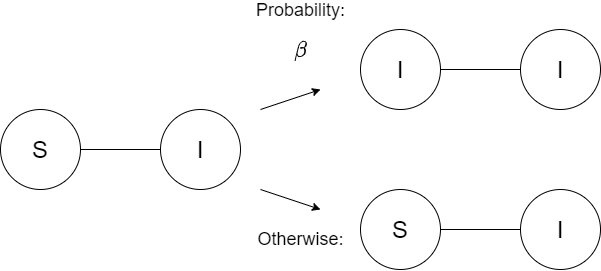

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

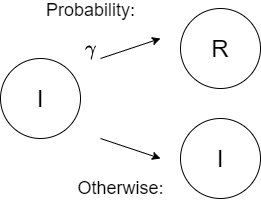

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

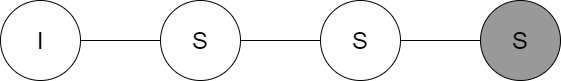

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

**Solution to Part A**:
$P($Last node infected after 3 timesteps$) = (\beta)^3$
$P($first node still infected after 3 timesteps$) = 1 - (\gamma)^3$

**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

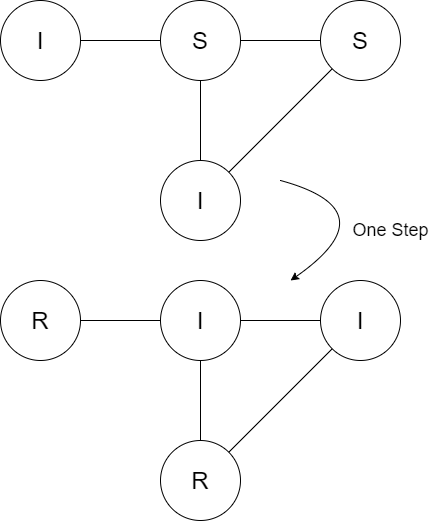

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Solution to Part B**: 

$(\gamma)^2 * (\beta)^2$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

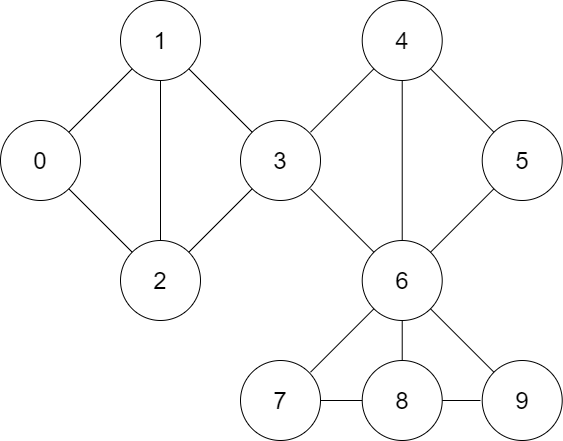

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [5]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], \
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [6]:
#initialState = ['I','S','S','I','I','S','S','S','S','I']
initialState = ['R','R','R','I','I','S','S','S','S','I']

def probFunction(prob):
    percent = prob * 100
    randomInt = np.random.randint(0, 100)
    if(randomInt <= percent):
        return True
    return False


def SIR_step(initial_state, gamma, beta):
    new_state = initial_state
    origState = []
    
    for r in initial_state:
        if(r == 'I'):
            origState.append('K')
        elif(r == 'S'):
            origState.append('L')
        else:
            origState.append('J')
        
    #print(origState)
    #origState = ['K','L','L','K','K','L','L','L','L','K']
    
    edgesZero = ((0,1), (0,2))
    edgesOne =  ((1,0), (1,2), (1,3))
    edgesTwo = ((2,0), (2,1), (2,3))
    edgesThree = ((3,1), (3,2), (3,4), (3,6))
    edgesFour = ((4,3), (4,5), (4,6))
    edgesFive = ((5,4), (5,6))
    edgesSix = ((6,3), (6,4), (6,5), (6,7), (6,8), (6,9))
    edgesSeven = ((7,6), (7,8))
    edgesEight = ((8,6), (8,7), (8,9))
    edgesNine = ((9,6), (9,8))

    
    edgeArr = (edgesZero, edgesOne, edgesTwo, edgesThree, edgesFour, edgesFive, edgesSix, edgesSeven, edgesEight, edgesNine)

    for j in range(0,10):
        node = edgeArr[j]
        lengthArr = len(node)
        if(origState[j] == 'K'):
            
            
            if(probFunction(gamma)):
                if(origState[j] == 'K'):
                    new_state[j] = 'R'
            
            for i in range(0,lengthArr):
                if(probFunction(beta)):
                    switch = node[i][1]
                    if(origState[switch] == 'L'):
                        new_state[switch] = 'I'
    return(new_state)

SIR_step(initialState, 0.5, 0.5)


['R', 'R', 'R', 'I', 'R', 'S', 'I', 'S', 'S', 'R']

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [7]:
check = ['S','S','S','S','S','S','S','S','S','S']
print(SIR_step(check, 0.5, 0.5))
print("With no infected nodes, an infection never occurs")
checkTwo = ['I', 'I', 'I', 'R', 'I', 'S', 'I', 'I', 'I', 'I']

for x in range(0,10):
    update = SIR_step(checkTwo, 0.5, 0)
    SIR_step(update, .5, 0)

print(update)
print("With beta = 0 there are no new trasmisions and all the infected people eventually become recovered")



['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
With no infected nodes, an infection never occurs
['R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R']
With beta = 0 there are no new trasmisions and all the infected people eventually become recovered


Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [8]:


#df_recoverday=pd.DataFrame(data=None, columns=np.array(range(10)))

def fivehunedSteps(states, gamma, beta):

    df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
    df_per_run.loc[0,:]=states
    df_per_run.head()

    for k in range(1,500):
    
        test = SIR_step(states, gamma, beta)
        df_per_run.loc[k,:]=test
        states = test
        #print(test)
    
    #nodeOne = df_per_run[0]
    #print(nodeOne)
    
    df_overall=pd.DataFrame(data=None, columns=np.array(range(10)))
    #df_daysinfected=pd.DataFrame(data=None, columns=np.array(range(10)))

    
    
    for v in range(0,10):
        recoverDay = 0
        daysInfected = 0
        for i in range(len(df_per_run)): 
            if((df_per_run.loc[i, v]) == 'I'):
                daysInfected += 1
            if((df_per_run.loc[i, v]) == 'R'):
                recoverDay = i
                break
    
        df_overall.loc[0,v] = recoverDay
        df_overall.loc[1,v] = daysInfected


    #print(df_overall)

    return df_overall

#############################################################################################################################
df_finalRecoverDayOne=pd.DataFrame(data=None, columns=np.array(range(10)))
df_finalDaysInfectedOne=pd.DataFrame(data=None, columns=np.array(range(10)))

initial = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
for y in range(0,100):
    df_temp = fivehunedSteps(initial, 0.1, 0.1)
    initial = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    df_finalRecoverDayOne.loc[y,:] = df_temp.loc[0,:]
    df_finalDaysInfectedOne.loc[y,:] = df_temp.loc[1,:]
    
    
print(df_finalRecoverDayOne, "recover day One")
print(df_finalDaysInfectedOne, "days infected One")

#############################################################################################################################
df_finalRecoverDayTwo=pd.DataFrame(data=None, columns=np.array(range(10)))
df_finalDaysInfectedTwo=pd.DataFrame(data=None, columns=np.array(range(10)))

initial = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
for y in range(0,100):
    df_temp = fivehunedSteps(initial, 0.2, 0.05)
    initial = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    df_finalRecoverDayTwo.loc[y,:] = df_temp.loc[0,:]
    df_finalDaysInfectedTwo.loc[y,:] = df_temp.loc[1,:]
    
    
print(df_finalRecoverDayTwo, "recover day Two")
print(df_finalDaysInfectedTwo, "days infected Two")

#############################################################################################################################
df_finalRecoverDayThree=pd.DataFrame(data=None, columns=np.array(range(10)))
df_finalDaysInfectedThree=pd.DataFrame(data=None, columns=np.array(range(10)))

initial = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
for y in range(0,100):
    df_temp = fivehunedSteps(initial, 0.05, 0.2)
    initial = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    df_finalRecoverDayThree.loc[y,:] = df_temp.loc[0,:]
    df_finalDaysInfectedThree.loc[y,:] = df_temp.loc[1,:]
    
    
print(df_finalRecoverDayThree, "recover day Three")
print(df_finalDaysInfectedThree, "days infected Three")

###############################################################################################################################

#extract the following: time step at which infection ended, time spent infected for each node.
#one idea: save in new df:
# df_overall= #up to you!

     0   1   2  3   4   5   6   7   8   9
0   29  28  40  9   6  15   8  14   7  10
1    0   0   0  1   9  17  43   7  15  40
2   14   3  16  7  14   7   9  32   8  20
3   10  12  19  8   5   5   2   0   0   0
4    5  13   5  3  18  21  13  17  11   6
..  ..  ..  .. ..  ..  ..  ..  ..  ..  ..
95   0   0   0  5   3  21  23  11   8  16
96   0   0   0  3  10  10  21  11   7  23
97   0   0   0  1   2   0   2   0   0   0
98   0   0   0  5  16   3   8   0   0   0
99   0   0   0  1   4   7   1   0   0   0

[100 rows x 10 columns] recover day One
     0   1   2  3   4   5   6   7   8   9
0   25  26  39  9   6   9   8  10   2   8
1    0   0   0  1   9   6  43   5  11  12
2    4   2  13  7  14   2   9  29   5  19
3    3   6  16  8   5   1   2   0   0   0
4    2  12   3  3  18  18  13  10   9   5
..  ..  ..  .. ..  ..  ..  ..  ..  ..  ..
95   0   0   0  5   3  12  23   8   7  12
96   0   0   0  3  10   6  21   7   6   6
97   0   0   0  1   2   0   2   0   0   0
98   0   0   0  5  16   2   8   0  

**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [9]:
print("Please give the function above some time! it takes a while to run")


#recommended output style: 
numCasesOne = 0
for i in range (0,100):
    if(df_finalRecoverDayOne[1][i] == 0):
        numCasesOne +=1
print('For beta=',0.1,' and gamma=',0.1,' node zero was never infected', numCasesOne," times out of 100 tries")

numCasesTwo = 0
for i in range (0,100):
    if(df_finalRecoverDayTwo[1][i] == 0):
        numCasesTwo +=1
print('For beta=',0.05,' and gamma=',0.2,' node zero was never infected', numCasesTwo," times out of 100 tries")

numCasesThree = 0
for i in range (0,100):
    if(df_finalRecoverDayThree[1][i] == 0):
        numCasesThree +=1
print('For beta=',0.2,' and gamma=',0.05,' node zero was never infected', numCasesThree," times out of 100 tries")

Please give the function above some time! it takes a while to run
For beta= 0.1  and gamma= 0.1  node zero was never infected 31  times out of 100 tries
For beta= 0.05  and gamma= 0.2  node zero was never infected 76  times out of 100 tries
For beta= 0.2  and gamma= 0.05  node zero was never infected 10  times out of 100 tries


** Part F: **

Was there a time step after which no nodes were infected?  If so, when did this happen?  Make a three vertically-aligned histograms of when the infection disappeared, including instances where it was still present at time 500 as `time=501`.

no nodes were infected after timestep 106


Text(0, 0.5, 'Frequency')

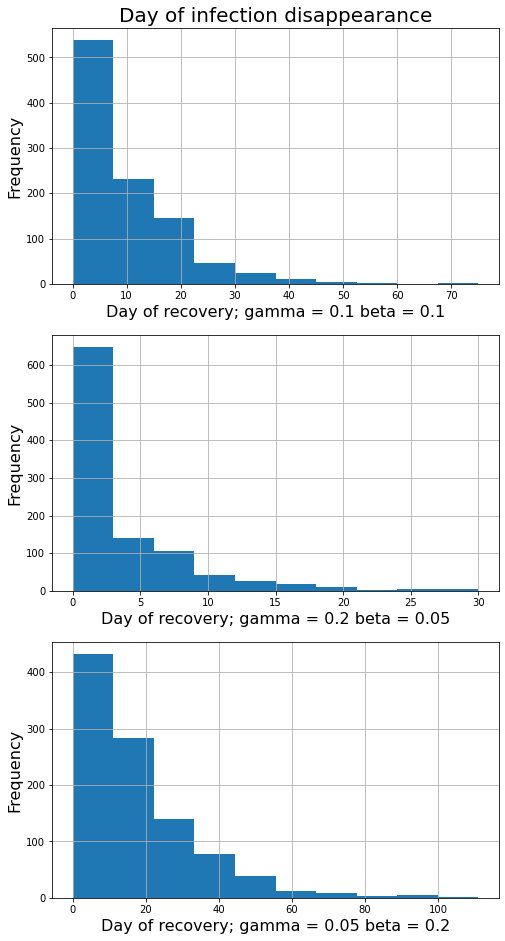

In [10]:
#dfMean = df_finalRecoverDayOne.mean()
print("no nodes were infected after timestep 106")

df_Col0 = df_finalRecoverDayOne[0]
df_Col1 = df_finalRecoverDayOne[1]
df_Col2 = df_finalRecoverDayOne[2]
df_Col3 = df_finalRecoverDayOne[3]
df_Col4 = df_finalRecoverDayOne[4]
df_Col5 = df_finalRecoverDayOne[5]
df_Col6 = df_finalRecoverDayOne[6]
df_Col7 = df_finalRecoverDayOne[7]
df_Col8 = df_finalRecoverDayOne[8]
df_Col9 = df_finalRecoverDayOne[9]

    
frames = [df_Col0,df_Col1,df_Col2,df_Col3,df_Col4,df_Col5,df_Col6,df_Col7,df_Col8,df_Col9,]

result = pd.concat(frames)


df2_Col0 = df_finalRecoverDayTwo[0]
df2_Col1 = df_finalRecoverDayTwo[1]
df2_Col2 = df_finalRecoverDayTwo[2]
df2_Col3 = df_finalRecoverDayTwo[3]
df2_Col4 = df_finalRecoverDayTwo[4]
df2_Col5 = df_finalRecoverDayTwo[5]
df2_Col6 = df_finalRecoverDayTwo[6]
df2_Col7 = df_finalRecoverDayTwo[7]
df2_Col8 = df_finalRecoverDayTwo[8]
df2_Col9 = df_finalRecoverDayTwo[9]

    
framesTwo = [df2_Col0,df2_Col1,df2_Col2,df2_Col3,df2_Col4,df2_Col5,df2_Col6,df2_Col7,df2_Col8,df2_Col9,]

resultTwo = pd.concat(framesTwo)

result = pd.concat(frames)
df3_Col0 = df_finalRecoverDayThree[0]
df3_Col1 = df_finalRecoverDayThree[1]
df3_Col2 = df_finalRecoverDayThree[2]
df3_Col3 = df_finalRecoverDayThree[3]
df3_Col4 = df_finalRecoverDayThree[4]
df3_Col5 = df_finalRecoverDayThree[5]
df3_Col6 = df_finalRecoverDayThree[6]
df3_Col7 = df_finalRecoverDayThree[7]
df3_Col8 = df_finalRecoverDayThree[8]
df3_Col9 = df_finalRecoverDayThree[9]

    
framesThree = [df3_Col0,df3_Col1,df3_Col2,df3_Col3,df3_Col4,df3_Col5,df3_Col6,df3_Col7,df3_Col8,df3_Col9,]

resultThree = pd.concat(framesThree)


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,16))

result.hist(ax=axes[0])
axes[0].set_title("Day of infection disappearance", fontsize=20)
axes[0].set_xlabel("Day of recovery; gamma = 0.1 beta = 0.1", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)



resultTwo.hist(ax=axes[1])
axes[1].set_xlabel("Day of recovery; gamma = 0.2 beta = 0.05", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)


resultThree.hist(ax=axes[2])
axes[2].set_xlabel("Day of recovery; gamma = 0.05 beta = 0.2", fontsize=16)
axes[2].set_ylabel("Frequency", fontsize=16)



** Part G: **

Create a line graph with three lines showing the average number of time steps spent infected for each node.  The lines will have an x-axis of the index of each node and a y-axis of the average number of time steps spent infected.  There should be one line per pair of $\beta, \gamma$ values.

Sanity check: for the 3 nodes that start as infected, explain approximately what should this number be in terms of the distributions discussed in the class.

Text(0, 0.5, 'average time spent infected(TimeSteps)')

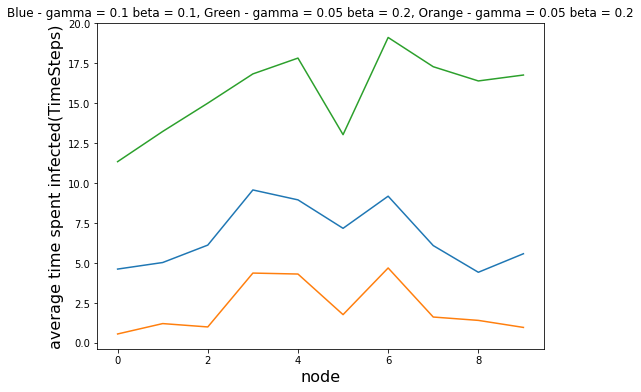

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

dfOneMean = df_finalDaysInfectedOne.mean()
#print(dfOneMean)
dfTwoMean = df_finalDaysInfectedTwo.mean()
#print(dfTwoMean)
dfThreeMean = df_finalDaysInfectedThree.mean()
#print(dfThreeMean)




lines = dfOneMean.plot.line(ax=axes)
lines = dfTwoMean.plot.line(ax=axes)
lines = dfThreeMean.plot.line(ax=axes)

axes.set_title("Blue - gamma = 0.1 beta = 0.1, Green - gamma = 0.05 beta = 0.2, Orange - gamma = 0.05 beta = 0.2")
axes.set_xlabel("node", fontsize=16)
axes.set_ylabel("average time spent infected(TimeSteps)", fontsize=16)

**Part H: **

Comment on anything you found interesting or unusual.

In [12]:
print("I found it interesting that the proportions of beta to gamma was nearly the same as the proportion of time infected for each node")

I found it interesting that the proportions of beta to gamma was nearly the same as the proportion of time infected for each node


Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check our course offerings by Aaron Clauset and Dan Larremore for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>